#Data Cleaning#

Importing the required Python libraries

In [ ]:
# load libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
import re
import category_encoders as ce
import plotly.express as px
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

Load the Stars.csv dataset

In [ ]:
#load and display stars.csv
d1 = pd.read_csv('https://raw.githubusercontent.com/aana0308/Star-Type-Classification/main/data/Stars.csv')
d1

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


Get information on the data available in the dataset provided

In [ ]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [ ]:
d1.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [ ]:
d1.duplicated().sum()

0

Chekcing deviation of values from normal bell curve

In [ ]:
d1.skew()

Temperature    1.321568
L              2.068069
R              1.946800
A_M           -0.121540
Type           0.000000
dtype: float64

Checking the number of categorical vairables in the given dataset

In [ ]:
d1.nunique()

Temperature       228
L                 208
R                 216
A_M               228
Color              17
Spectral_Class      7
Type                6
dtype: int64

As we can see from above results, Color, Type and Spectral_Class are categorical variables. The categories in each of the mentioned variables are :

In [ ]:
d1.Color.unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

In [ ]:
d1['Color'].value_counts()

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
Orange                  2
yellowish               2
Whitish                 2
Pale yellow orange      1
White-Yellow            1
Blue-White              1
Orange-Red              1
Yellowish               1
Name: Color, dtype: int64

In [ ]:
d1.Type.unique()

array([0, 1, 2, 3, 4, 5])

In [ ]:
d1['Type'].value_counts()

5    40
4    40
3    40
2    40
1    40
0    40
Name: Type, dtype: int64

In [ ]:
d1.Spectral_Class.unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [ ]:
d1['Spectral_Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64

Check how many NULL values are there in dataset

In [ ]:
d1.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

Correlation of variables

In [ ]:
d1.corr()

,Temperature,L,R,A_M,Type
Temperature,1.000000,0.393404,0.064216,-0.420261,0.411129
L,0.393404,1.000000,0.526516,-0.692619,0.676845
R,0.064216,0.526516,1.000000,-0.608728,0.660975
A_M,-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Type,0.411129,0.676845,0.660975,-0.955276,1.000000


In [ ]:
d1.groupby("Color").describe().T

Color                       Blue    Blue White  ...  yellow-white    yellowish
Temperature count      56.000000     10.000000  ...      8.000000     2.000000
            mean    21918.339286  14638.900000  ...   6466.250000  4301.500000
            std      9453.979609   4305.593892  ...   1049.074524   317.490945
            min      5752.000000   9675.000000  ...   5300.000000  4077.000000
            25%     14797.750000  12253.500000  ...   5746.750000  4189.250000
            50%     19921.500000  13760.000000  ...   6158.000000  4301.500000
            75%     27489.500000  16005.000000  ...   6997.750000  4413.750000
            max     40000.000000  25000.000000  ...   8250.000000  4526.000000
L           count      56.000000     10.000000  ...      8.000000     2.000000
            mean   249974.732446      0.007491  ...      2.940750     0.119000
            std    217947.633816      0.017475  ...      3.515042     0.048083
            min         0.001090      0.000450  ...      0.590000     0.085000
            25%    123250.000000      0.000687  ...      0.816750     0.102000
            50%    223890.000000      0.000800  ...      1.353500     0.119000
            75%    342910.000000      0.000955  ...      3.052500     0.136000
            max    834042.000000      0.056000  ...      9.250000     0.153000
R           count      56.000000     10.000000  ...      8.000000     2.000000
            mean      214.802452      0.010459  ...      1.159500     0.830000
            std       495.681463      0.002259  ...      0.342515     0.049497
            min         0.009340      0.008400  ...      0.900000     0.795000
            25%         6.351750      0.008975  ...      0.962500     0.812500
            50%        35.500000      0.009765  ...      1.048000     0.830000
            75%        80.250000      0.010665  ...      1.175000     0.847500
            max      1948.500000      0.015000  ...      1.930000     0.865000
A_M         count      56.000000     10.000000  ...      8.000000     2.000000
            mean       -2.382446     12.121000  ...      3.353750     6.367000
            std         7.934955      1.059092  ...      2.143461     0.196576
            min       -10.840000     10.580000  ...     -0.980000     6.228000
            25%        -6.912500     11.395000  ...      2.432500     6.297500
            50%        -5.982500     12.025000  ...      3.695000     6.367000
            75%        -4.390000     12.380000  ...      5.035000     6.436500
            max        12.900000     13.980000  ...      5.490000     6.506000
Type        count      56.000000     10.000000  ...      8.000000     2.000000
            mean        3.571429      2.000000  ...      3.000000     3.000000
            std         0.988243      0.000000  ...      0.000000     0.000000
            min         2.000000      2.000000  ...      3.000000     3.000000
            25%         3.000000      2.000000  ...      3.000000     3.000000
            50%         4.000000      2.000000  ...      3.000000     3.000000
            75%         4.000000      2.000000  ...      3.000000     3.000000
            max         5.000000      2.000000  ...      3.000000     3.000000

[40 rows x 17 columns]

In [ ]:
d1.groupby("Color").describe()["Type"]

,count,mean,std,min,25%,50%,75%,max
Color,,,,,,,,
Blue,56.0,3.571429,0.988243,2.0,3.0,4.0,4.0,5.0
Blue White,10.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
Blue white,4.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
Blue-White,1.0,3.000000,NaN,3.0,3.0,3.0,3.0,3.0
Blue-white,26.0,3.461538,0.859338,3.0,3.0,3.0,3.0,5.0
Orange,2.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0
Orange-Red,1.0,3.000000,NaN,3.0,3.0,3.0,3.0,3.0
Pale yellow orange,1.0,2.000000,NaN,2.0,2.0,2.0,2.0,2.0
Red,112.0,1.705357,1.975701,0.0,0.0,1.0,4.0,5.0


From above we can see that few categories of Color are basically the same, so for convenience they can be made into single categories

In [ ]:
d1["Color"] = d1.loc[:, "Color"].str.replace("Whitish|white", "White", regex=True)
d1["Color"] = d1.loc[:, "Color"].str.replace("blu.+whit.+", "blue-white", flags=re.IGNORECASE, regex=True)
d1["Color"] = d1.loc[:, "Color"].str.replace("(yell.+whit.+)|(whit.+yell.+)", "yellow-white", flags=re.IGNORECASE, regex=True)
d1["Color"] = d1.loc[:, "Color"].str.replace("yellowish", "Yellow", regex=True, flags=re.IGNORECASE)
d1.Color.unique()

array(['Red', 'blue-white', 'White', 'yellow-white', 'Pale yellow orange',
       'Blue', 'Orange', 'Yellow', 'Orange-Red'], dtype=object)

In [ ]:
d1['Color'].value_counts()

Red                   112
Blue                   56
blue-white             41
yellow-white           12
White                  12
Yellow                  3
Orange                  2
Orange-Red              1
Pale yellow orange      1
Name: Color, dtype: int64

Encoding 

In [ ]:
#Creating encoder object
encoder=ce.OneHotEncoder(cols=['Color','Spectral_Class'],handle_unknown='return_nan',return_df=True,use_cat_names=True)

#Fit and transform Data
data_encoded = encoder.fit_transform(d1)
data_encoded

,Temperature,L,R,A_M,Color_Red,Color_blue-white,Color_White,Color_yellow-white,Color_Pale yellow orange,Color_Blue,Color_Orange,Color_Yellow,Color_Orange-Red,Spectral_Class_M,Spectral_Class_B,Spectral_Class_A,Spectral_Class_F,Spectral_Class_O,Spectral_Class_K,Spectral_Class_G,Type
0,3068,0.002400,0.1700,16.12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,3042,0.000500,0.1542,16.60,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2600,0.000300,0.1020,18.70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2800,0.000200,0.1600,16.65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1939,0.000138,0.1030,20.06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5
236,30839,834042.000000,1194.0000,-10.63,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5
237,8829,537493.000000,1423.0000,-10.73,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5
238,9235,404940.000000,1112.0000,-11.23,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5


#Data visualisation#

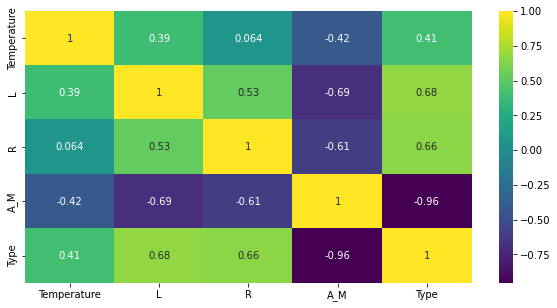

In [ ]:
plt.figure(figsize=(10,5))
x = d1.drop(['Color','Spectral_Class'],axis = 1)
ax = sns.heatmap(d1.corr(),annot = True,cmap = 'viridis')
plt.show()

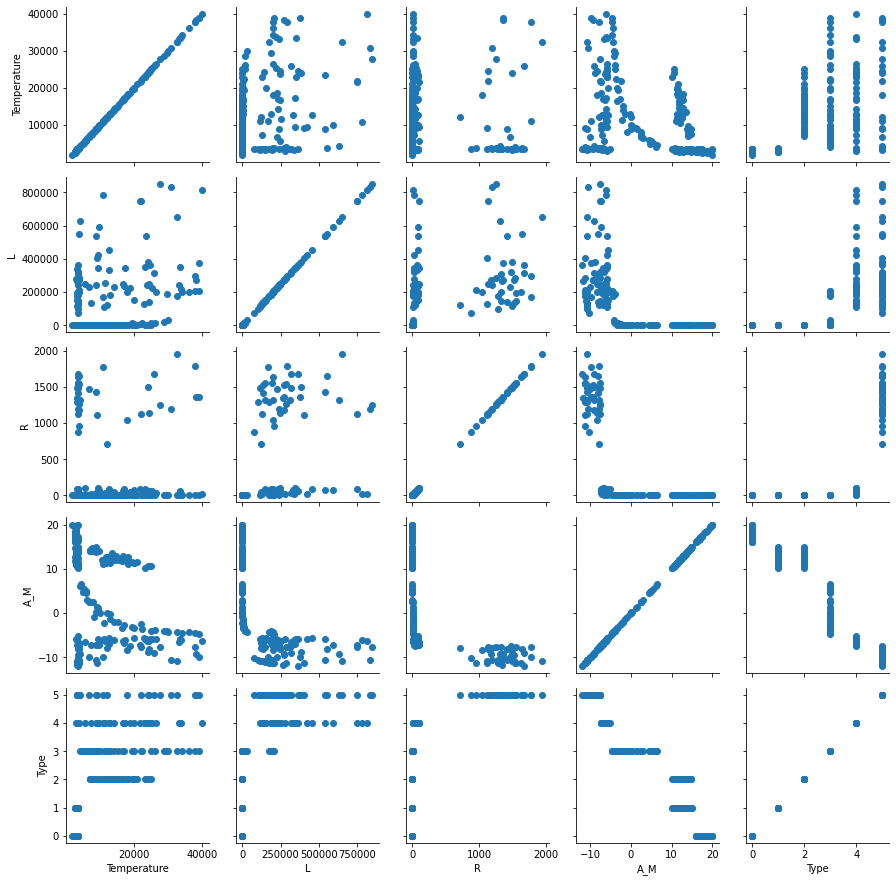

In [ ]:
x=sns.PairGrid(data=d1)
x.map(plt.scatter)

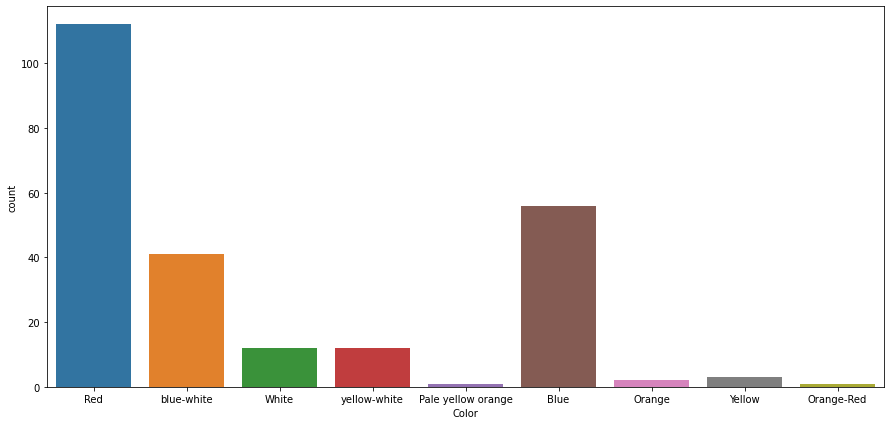

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(x = 'Color',data = d1)
plt.show()

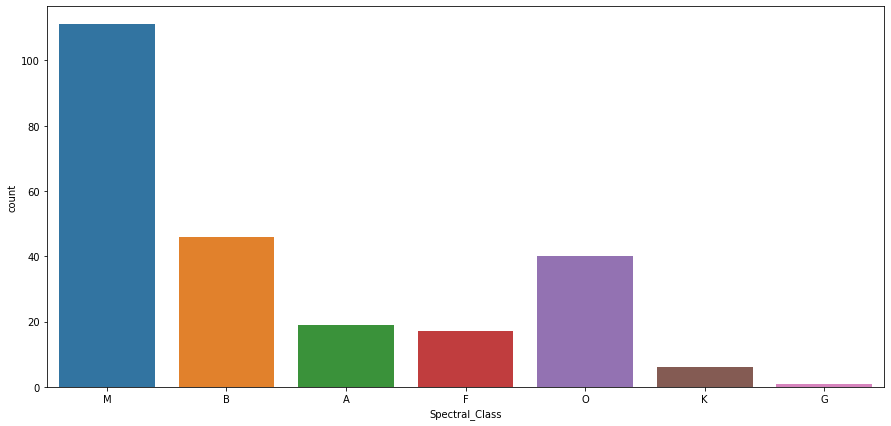

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(x = 'Spectral_Class',data = d1)
plt.show()

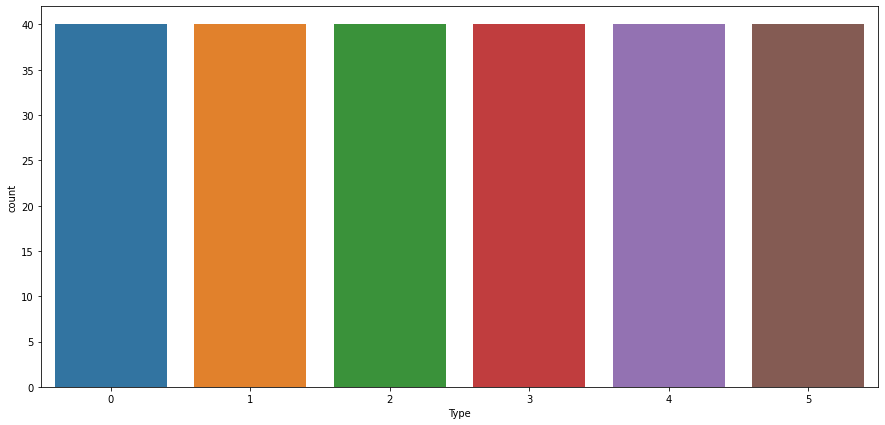

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(x = 'Type',data = d1)
plt.show()

In [ ]:
fig = px.histogram(d1, 'Temperature', color='Color', title="<b>Average Temparature by color</b>")
fig.show()

From the above graph we can observe that:
1. All stars which have red (except one red colored star which have temperature > 5k and < 10k), yellow and orange colors have temperature < 5k
2. Blue colored stars have the highest temperature out of all the other colors
3. Most of the white, yellow-white, pale yellow orange, orange-red stars have temperature > 5k and < 10k
4. Most blue-white stars have temperature > 10k and < 15k

In [ ]:
fig = px.histogram(d1, 'L', color='Color', title="<b>Average Relative Luminocity by color</b>")
fig.show()

From the above graph, we can observe that:
1. Most red, blue-white, white, yellow-white, pale-yellow orange, yellow and oraange-red stars have approximately 25 k luminosity
2. Red and blue colored stars have the highest luminosity
3. Most blue colored stars have luminosity > 125k and < 400k

In [ ]:
fig = px.histogram(d1, 'R', color='Color', title="<b>Average Relative Radius by color</b>")
fig.show()

From the above graph we can observe that:
1. 200 stars out of 240 have radius approximately 100
2. Blue stars have the highest radius (hence, they are biggest in size)

In [ ]:
fig = px.histogram(d1, 'A_M', color='Color', title="<b>Average Absolute Magnitude by color</b>")
fig.show()

From the above graph we can observe that red colored stars have the highest Absolute Magnitude (mostly)

In [ ]:
fig = px.histogram(d1, 'Temperature',             
                   color='Spectral_Class',
                   title="<b>Average Temparature by Spectral_Class</b>")
fig.show()

#Feature Scaling#

In [ ]:
#Feature scaling
scaler = StandardScaler()
scaler.fit(data_encoded.drop('Type',axis = 1))
scaled_features = scaler.transform(data_encoded.drop('Type',axis = 1))

final_dataset = pd.DataFrame(scaled_features,columns = data_encoded.columns[:-1])
final_dataset

,Temperature,L,R,A_M,Color_Red,Color_blue-white,Color_White,Color_yellow-white,Color_Pale yellow orange,Color_Blue,Color_Orange,Color_Yellow,Color_Orange-Red,Spectral_Class_M,Spectral_Class_B,Spectral_Class_A,Spectral_Class_F,Spectral_Class_O,Spectral_Class_K,Spectral_Class_G
0,-0.779382,-0.598624,-0.459210,1.116745,1.069045,-0.453905,-0.229416,-0.229416,-0.064685,-0.551677,-0.09167,-0.112509,-0.064685,1.078036,-0.486943,-0.293211,-0.276104,-0.447214,-0.160128,-0.064685
1,-0.782110,-0.598624,-0.459241,1.162414,1.069045,-0.453905,-0.229416,-0.229416,-0.064685,-0.551677,-0.09167,-0.112509,-0.064685,1.078036,-0.486943,-0.293211,-0.276104,-0.447214,-0.160128,-0.064685
2,-0.828477,-0.598624,-0.459342,1.362213,1.069045,-0.453905,-0.229416,-0.229416,-0.064685,-0.551677,-0.09167,-0.112509,-0.064685,1.078036,-0.486943,-0.293211,-0.276104,-0.447214,-0.160128,-0.064685
3,-0.807496,-0.598624,-0.459229,1.167171,1.069045,-0.453905,-0.229416,-0.229416,-0.064685,-0.551677,-0.09167,-0.112509,-0.064685,1.078036,-0.486943,-0.293211,-0.276104,-0.447214,-0.160128,-0.064685
4,-0.897819,-0.598624,-0.459340,1.491607,1.069045,-0.453905,-0.229416,-0.229416,-0.064685,-0.551677,-0.09167,-0.112509,-0.064685,1.078036,-0.486943,-0.293211,-0.276104,-0.447214,-0.160128,-0.064685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2.983743,1.494720,2.167974,-1.361718,-0.935414,-0.453905,-0.229416,-0.229416,-0.064685,1.812654,-0.09167,-0.112509,-0.064685,-0.927613,-0.486943,-0.293211,-0.276104,2.236068,-0.160128,-0.064685
236,2.133913,4.059319,1.854068,-1.428317,-0.935414,-0.453905,-0.229416,-0.229416,-0.064685,1.812654,-0.09167,-0.112509,-0.064685,-0.927613,-0.486943,-0.293211,-0.276104,2.236068,-0.160128,-0.064685
237,-0.175029,2.403157,2.297800,-1.437832,-0.935414,-0.453905,4.358899,-0.229416,-0.064685,-0.551677,-0.09167,-0.112509,-0.064685,-0.927613,-0.486943,3.410510,-0.276104,-0.447214,-0.160128,-0.064685
238,-0.132438,1.662878,1.695177,-1.485403,-0.935414,-0.453905,4.358899,-0.229416,-0.064685,-0.551677,-0.09167,-0.112509,-0.064685,-0.927613,-0.486943,3.410510,-0.276104,-0.447214,-0.160128,-0.064685


#Save the finally obtained dataset#

Save final_dataset dataframe as csv file

In [ ]:
final_dataset.to_csv('final_dataset.csv')

Save data_encoded dataframe as csv file for feature selection

In [124]:
final_dataset.to_csv('data_encoded.csv')